# Clustering Penguin Species

Dataset: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
penguins = pd.read_csv("penguins.csv")
df = penguins.copy()

In [3]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,335.0,43.988358,5.453430,32.1,39.5,44.5,48.55,59.6
culmen_depth_mm,335.0,17.169552,1.971966,13.1,15.6,17.3,18.70,21.5
flipper_length_mm,335.0,214.355224,263.253508,-132.0,190.0,197.0,213.00,5000.0
body_mass_g,335.0,4209.179104,803.633495,2700.0,3550.0,4050.0,4787.50,6300.0


In [8]:
df.shape

(335, 5)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


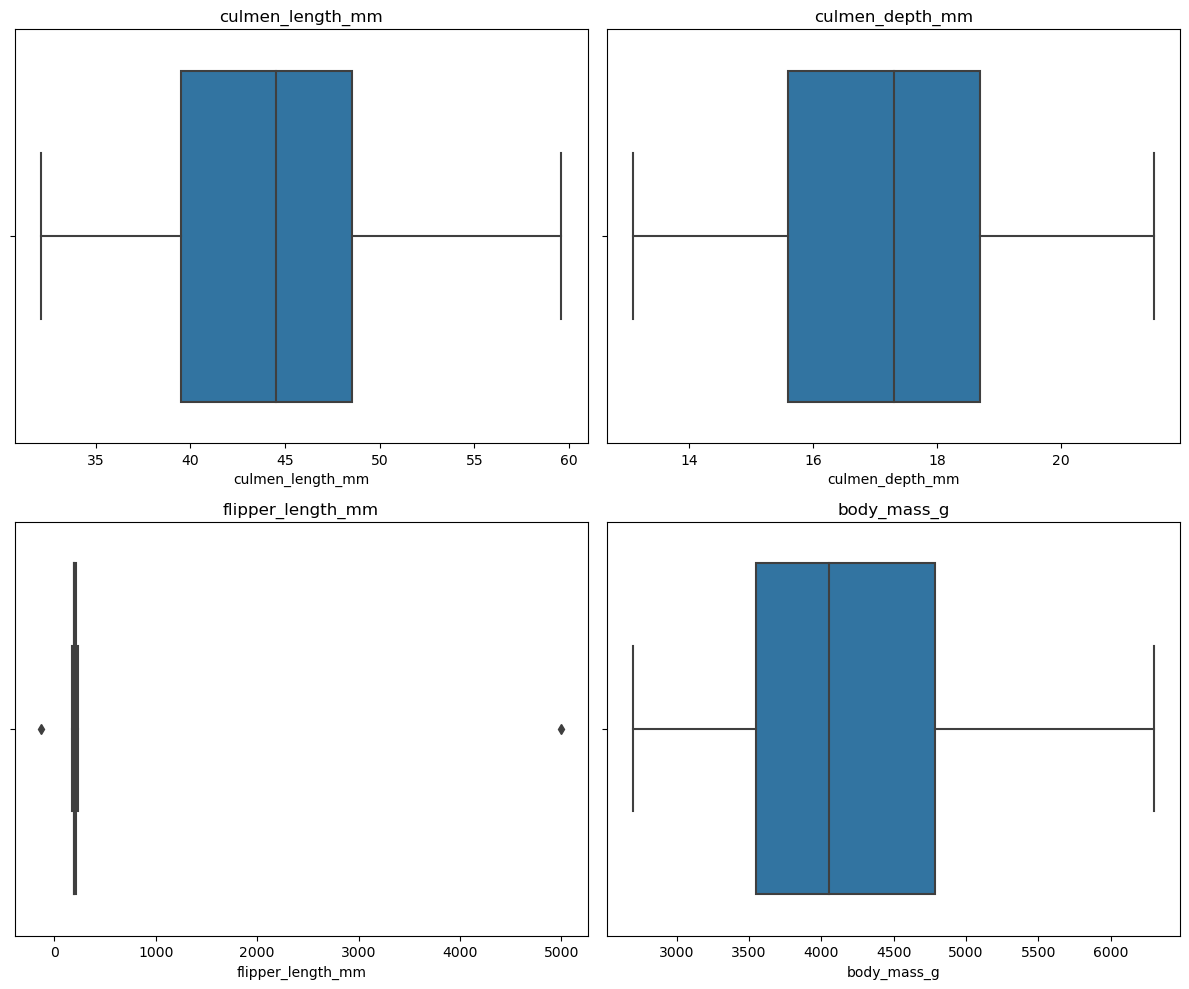

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, column in enumerate(df.drop(columns=["sex"]).columns):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
plt.tight_layout()
plt.show()

In [12]:
# Let's handle the "flipper_length_mm" column

Q1 = df["flipper_length_mm"].quantile(0.25)
Q3 = df["flipper_length_mm"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["flipper_length_mm"] = np.where(df["flipper_length_mm"] < lower_bound, lower_bound, df["flipper_length_mm"])
df["flipper_length_mm"] = np.where(df["flipper_length_mm"] > upper_bound, upper_bound, df["flipper_length_mm"])

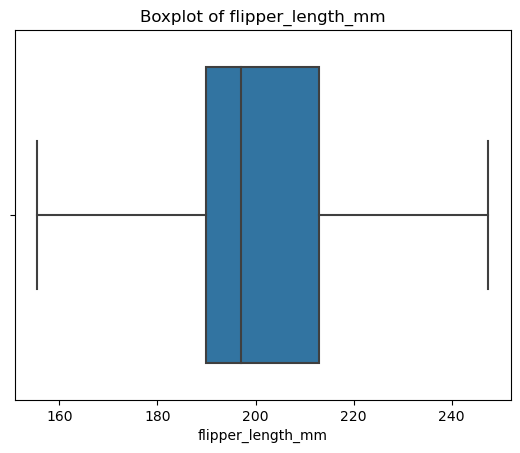

In [13]:
sns.boxplot(data=df, x=df["flipper_length_mm"])
plt.title("Boxplot of flipper_length_mm")
plt.show()

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,335.0,43.988358,5.453430,32.1,39.5,44.5,48.55,59.6
culmen_depth_mm,335.0,17.169552,1.971966,13.1,15.6,17.3,18.70,21.5
flipper_length_mm,335.0,201.026866,14.445671,155.5,190.0,197.0,213.00,247.5
body_mass_g,335.0,4209.179104,803.633495,2700.0,3550.0,4050.0,4787.50,6300.0


In [15]:
df["sex"].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [16]:
df = df[df["sex"] != "."]

In [17]:
df["sex"].value_counts()

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

## Analyzing Relationships

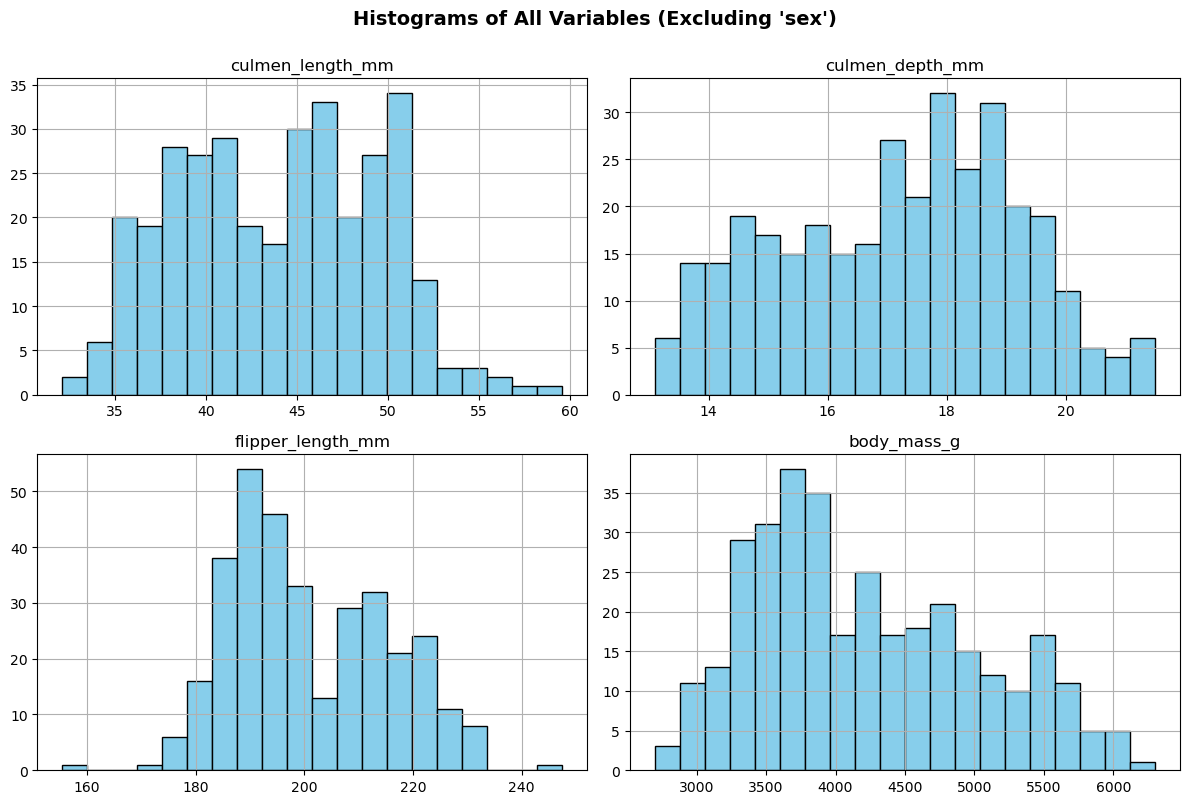

In [18]:
df.drop(columns=["sex"]).hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Variables (Excluding 'sex')", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

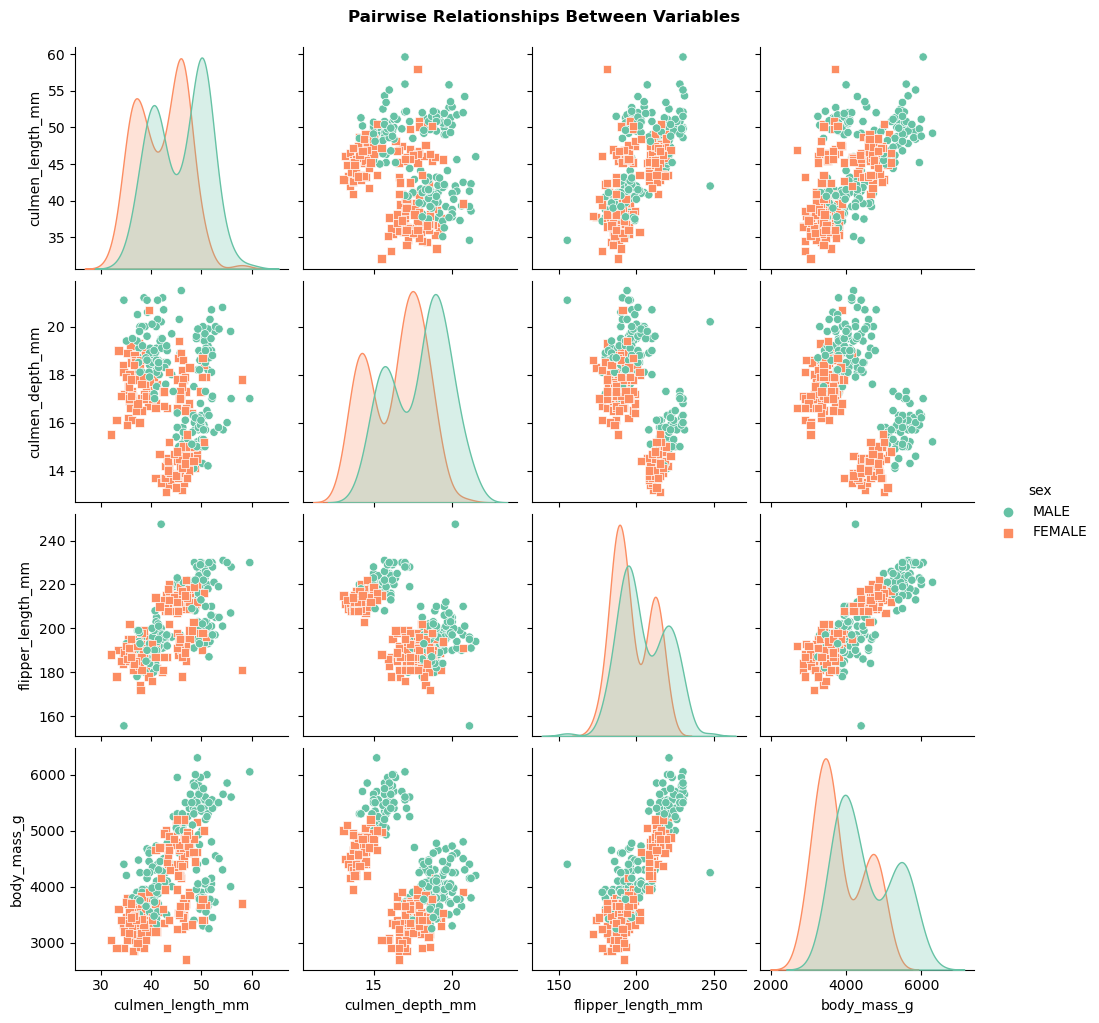

In [19]:
sns.pairplot(df, hue="sex", palette="Set2", markers=["o", "s"])
plt.suptitle("Pairwise Relationships Between Variables", fontsize=12, fontweight='bold', y=1.02)
plt.show()

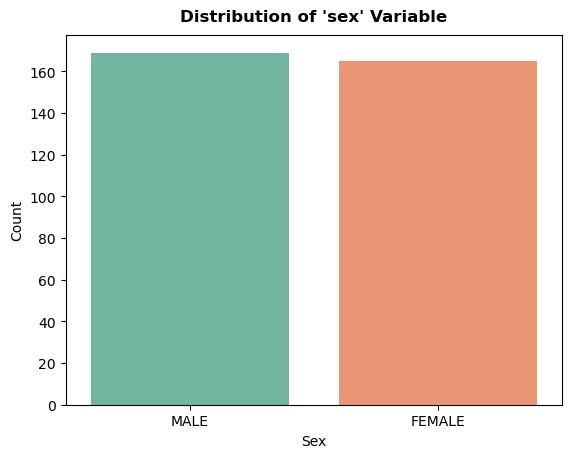

In [20]:
sns.countplot(x="sex", data=df, palette="Set2")
plt.title("Distribution of 'sex' Variable", fontsize=12, fontweight='bold', pad=10)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [21]:
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

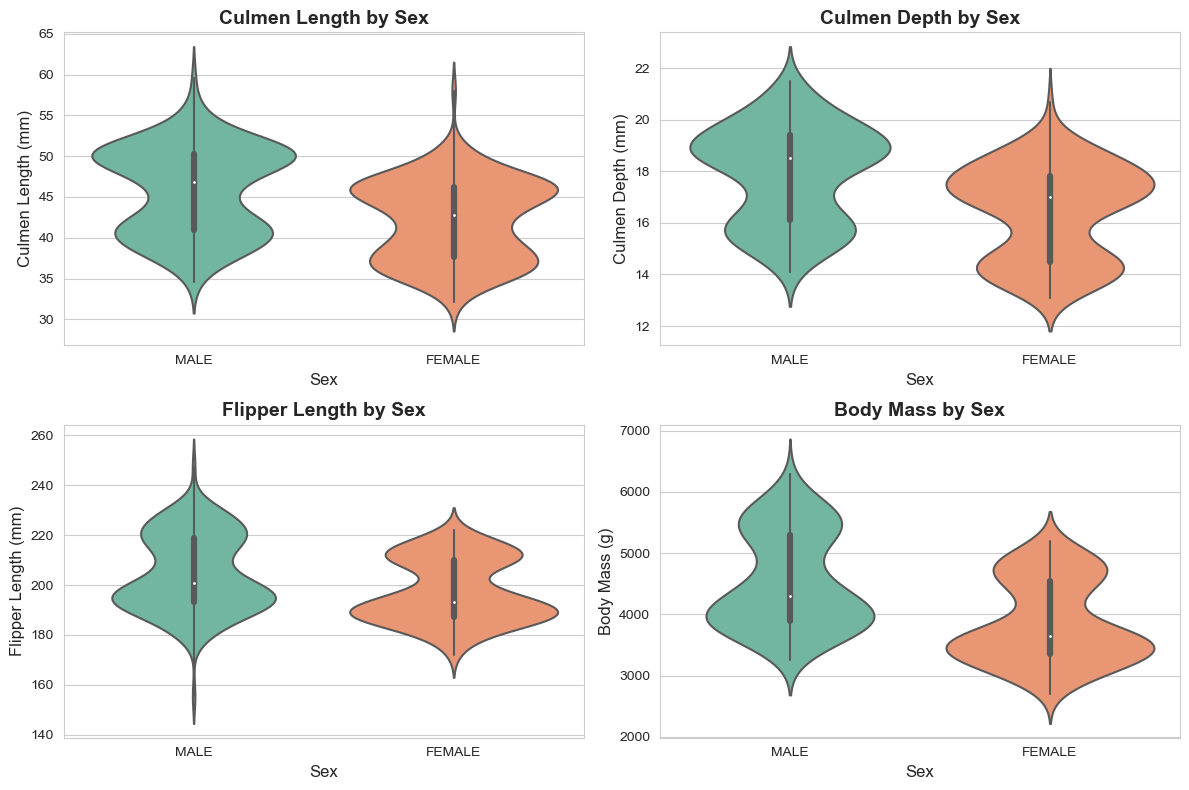

In [22]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Culmen Length vs Sex
sns.violinplot(data=df, x="sex", y="culmen_length_mm", palette="Set2", legend=False, ax=axes[0, 0])
axes[0, 0].set_title("Culmen Length by Sex", fontsize=14, fontweight="bold")
axes[0, 0].set_xlabel("Sex", fontsize=12)
axes[0, 0].set_ylabel("Culmen Length (mm)", fontsize=12)

# Culmen Depth vs Sex
sns.violinplot(data=df, x="sex", y="culmen_depth_mm", palette="Set2", legend=False, ax=axes[0, 1])
axes[0, 1].set_title("Culmen Depth by Sex", fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel("Sex", fontsize=12)
axes[0, 1].set_ylabel("Culmen Depth (mm)", fontsize=12)

# Flipper Length vs Sex
sns.violinplot(data=df, x="sex", y="flipper_length_mm", palette="Set2", legend=False, ax=axes[1, 0])
axes[1, 0].set_title("Flipper Length by Sex", fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel("Sex", fontsize=12)
axes[1, 0].set_ylabel("Flipper Length (mm)", fontsize=12)

# Body Mass vs Sex
sns.violinplot(data=df, x="sex", y="body_mass_g", palette="Set2", legend=False, ax=axes[1, 1])
axes[1, 1].set_title("Body Mass by Sex", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel("Sex", fontsize=12)
axes[1, 1].set_ylabel("Body Mass (g)", fontsize=12)

plt.tight_layout()
plt.show()

### Dummy

In [23]:
df = pd.get_dummies(df, columns=["sex"])

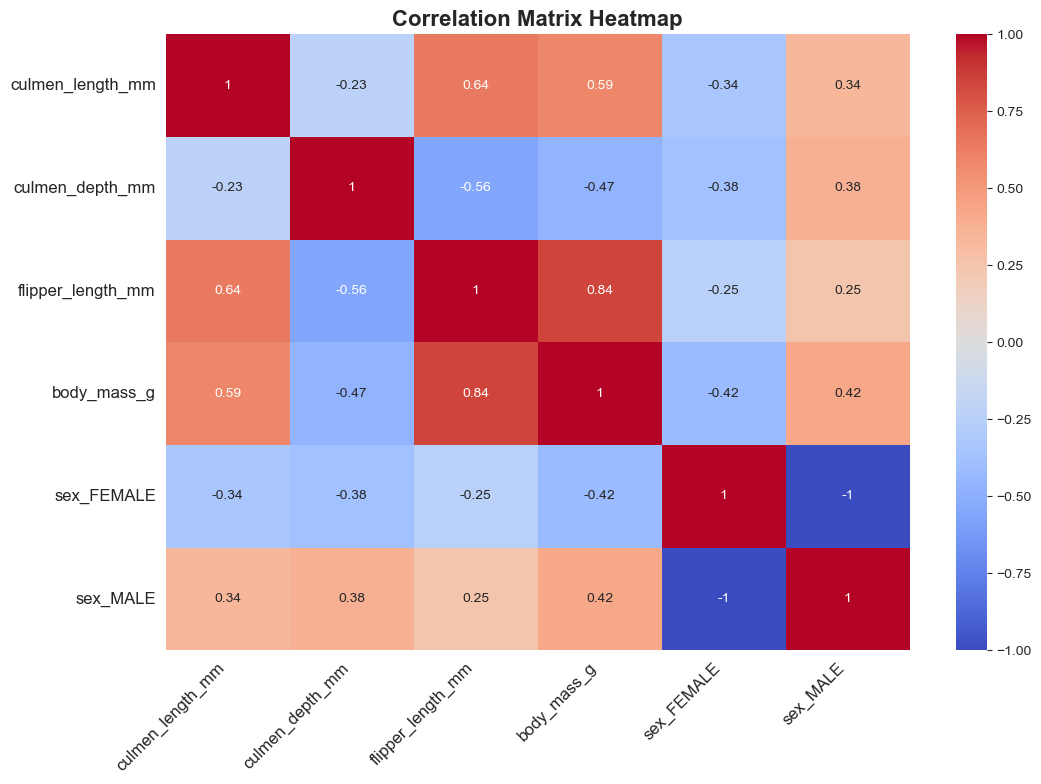

In [24]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, fontsize=12, ha="right")
plt.yticks(rotation=0, fontsize=12)
plt.show()

## Clustering

### K-Means

In [25]:
from sklearn.cluster import KMeans

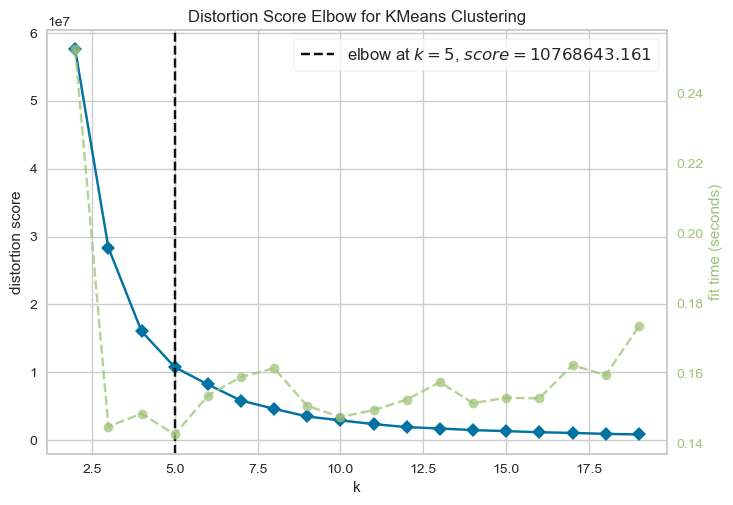

In [26]:
# Let's find the best number of clusters

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(df)
visualizer.poof();

We can select the number of clusters as 5.

In [33]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df)

#### 2D

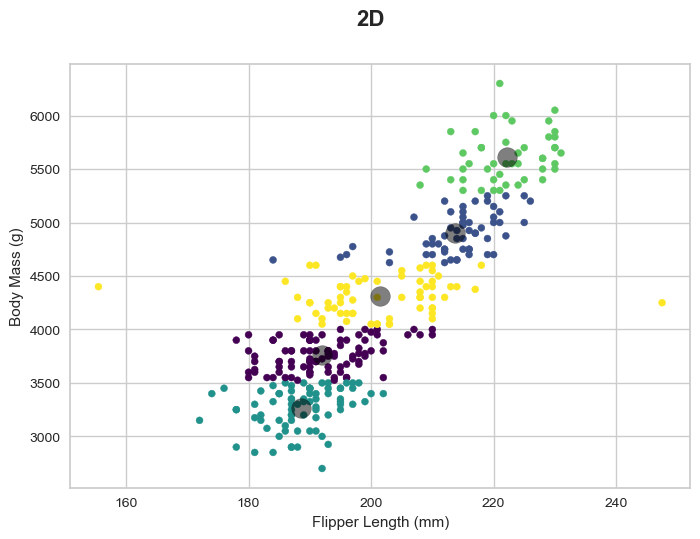

In [35]:
clusters = k_fit.labels_
centers = k_fit.cluster_centers_

plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=clusters, s=25, cmap="viridis")
plt.scatter(centers[:, 2], centers[:, 3], c="black", s=200, alpha=0.5)

plt.suptitle("2D", fontsize=16, fontweight="bold")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

#### 3D

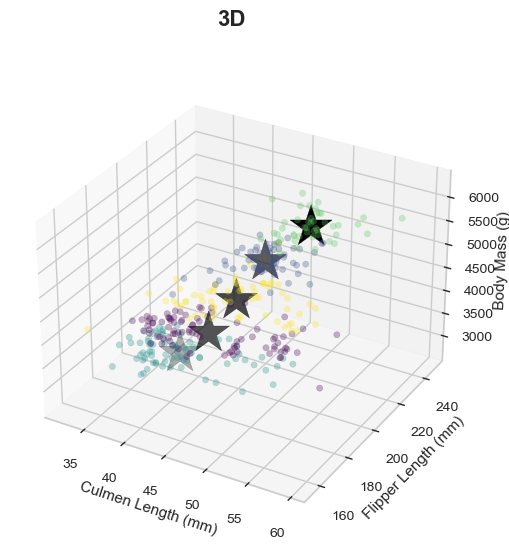

In [40]:
plt.rcParams["figure.figsize"] = (8, 6)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df.iloc[:, 0], df.iloc[:, 2], df.iloc[:, 3], c=clusters, cmap="viridis", alpha=0.3)
ax.scatter(centers[:, 0], centers[:, 2], centers[:, 3], marker="*", c="#000000", s=1000)

plt.suptitle("3D", fontsize=16, fontweight="bold")
ax.set_xlabel("Culmen Length (mm)")
ax.set_ylabel("Flipper Length (mm)")
ax.set_zlabel("Body Mass (g)")

plt.show()